### **HW1-FRA503 Machine Learning**

### **Objective Goals**

The purposes of this project are:

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

### **Due date**
Tuesday 31/10/2023

### **Authors**


1. Natchanon Singha        64340500017

2. Thanaphan Rueangsuk     64340500025

### **Instructions**

1. You have to work on this project with classmates (1-3 people per group).
2. You must use the Python notebook (files.ipynb) for your written report to explain the processes of building the machine learning models.
3. The report must contain the contents following “Project Assignment”.

### **Project Assignment**

**Your notebook must contain the following contents:**

**1. Data Exploration**
- How many attributes in the dataset
- Observations of good and bad things about the dataset 
- List of all attributes that you would keep or remove from the dataset and why 

**2. Data Preprocessing**
- Missing Values 
- Feature Selection 
- Feature extraction

**3. Model Construction (Linear and Logistic regression model)**
- Code (Python) description
- Experimentation with different preprocessing
- Experimentation with different testing modes
- Presentation of resulting model and evaluation
- Observations and analysis of results

## **1. Data Exploration**

The dataset that will be used for analysis and modeling machine learning is taken from https://drive.google.com/drive/folders/1ZiGHe1q6rD-4qi0rhJBOJXvfck-0UE_P.


**You can elaborate more on your dataset such as the number and the meaning of attributes or problems arising in the dataset before using in the modeling.**

Import libary(s) and Access to the Dataset
- Import Pandas and Numpy to process the dataset.
- Using read_excel() to read the excel file(s).

**Exporting all of Schema from the dataset**

From the ECT dataset, there  9 sub-sheats, 48 features which shown below. 

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# From sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import itertools
# From sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [146]:
df_rcp = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_PartyList') 
df_inpro =  pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_province') 
df_prov =   pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_party_overview') 
df_rcs = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_status') 
df_rcc = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_Candidate') 
schema = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='Schema')
selected_col = ['Sheet', 'Column', 'Description','Data Type_!']
schema = schema[selected_col]
print('All of instance in dataset',schema.shape)
schema

All of instance in dataset (48, 4)


,Sheet,Column,Description,Data Type_!
0,Candidate_Constituency,mp_app_id,Candidate ID,Categorical (Norminal)
1,Candidate_Constituency,mp_app_no,Candidate Name,Categorical (Norminal)
2,Candidate_Constituency,mp_app_party_id,Party code,Categorical (Norminal)
3,Candidate_Constituency,mp_app_name,Candidate Name,String
4,Candidate_Constituency,image_url,The URL of Candidate img,String
5,Candidate_PartyList,party_no,Party No,String
6,Candidate_PartyList,list_no,Candidate List,Categorical (Norminal)
7,Candidate_PartyList,name,Candidate Name,String
8,Candidate_PartyList,image_url,The URL of Candidate img,String
9,Candidate_PM,party_no,Party No,Categorical (Norminal)


#**2. Defining the problem statement**

**The goal** 

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

**The assumption**

 Pheu Thai Party (พรรคเพื่อไทย) is the most popular party in the Northeastern part (Isan) of Thailand.

- **Target Variable:** mp_app_rank
- **Predictors:** mp_app_vote, cons_id, mp_app_id, party_id.

  * mp_app_rank = 1 means the that party_id will win in that consituency.
  * mp_app_rank = other numbers means the party_id will not win in that consituency.

- **Samples:**  The voter who is going to do an elective in the Northeastern part (Isan) of Thailand.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a Classifier Decision Tree model and K-Nearest Neighbors model.

**However, from the experimental assumption which focus on constituencies candidate election. Therefore, we need to focus on sheet_name='result_constituencies_Candidate' from the .excel file.**

In [147]:
print('Shape before deleting duplicate values:', df_rcc.shape)
# Removing duplicate rows if any
df_rcc = df_rcc.drop_duplicates()
print('Shape After deleting duplicate values:', df_rcc.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df_rcc.head(10)

Shape before deleting duplicate values: (4781, 6)
Shape After deleting duplicate values: (4781, 6)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
5,ACR_1,ACR_1_2,10,234,0.22165,769
6,ACR_1,ACR_1_3,6,2701,2.55840,763
7,ACR_1,ACR_1_4,8,668,0.63273,719
8,ACR_1,ACR_1_5,4,15926,15.08515,701
9,ACR_1,ACR_1_6,3,16724,15.84102,726


#**3. Looking at the distribution of Target**



<Axes: xlabel='mp_app_rank'>

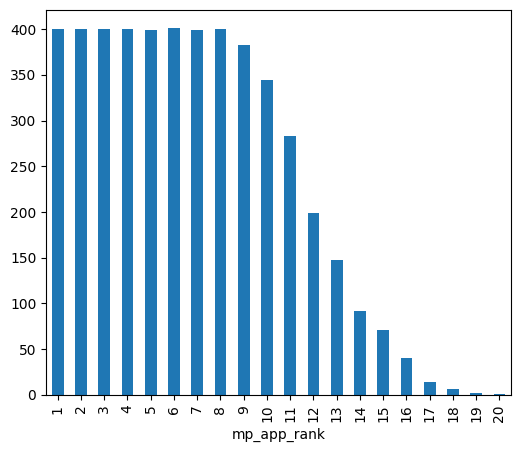

In [148]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=df_rcc.groupby('mp_app_rank').size()
GroupedData.plot(kind='bar', figsize=(6,5))

**4. Basic Data Exploration**

**Duplicate data**

In [149]:
# Using drop() to delete mp_app_id which is unnecessary data.
df = df_rcc.copy()
# Looking at sample rows in the data
df

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


**Observing the summarized information of data**

In [150]:
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cons_id              4781 non-null   object 
 1   mp_app_id            4781 non-null   object 
 2   mp_app_rank          4781 non-null   int64  
 3   mp_app_vote          4781 non-null   int64  
 4   mp_app_vote_percent  4781 non-null   float64
 5   party_id             4781 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 224.2+ KB


**Observing the descriptive statistics of the data**

In [151]:
df.describe(include='all')

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
count,4781,4781,4781.000000,4781.000000,4781.000000,4781.000000
unique,400,4781,NaN,NaN,NaN,NaN
top,KKN_4,ACR_1_1,NaN,NaN,NaN,NaN
freq,20,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.711985,7654.289898,8.223124,733.349090
std,NaN,NaN,3.845837,12389.868008,19.185614,23.968199
min,NaN,NaN,1.000000,0.000000,0.000000,701.000000
25%,NaN,NaN,3.000000,300.000000,0.309190,709.000000
50%,NaN,NaN,6.000000,780.000000,0.809330,729.000000
75%,NaN,NaN,10.000000,11738.000000,12.227910,762.000000


**Finding unique values for each column**

In [152]:
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

cons_id                 400
mp_app_id              4781
mp_app_rank              20
mp_app_vote            2880
mp_app_vote_percent    4628
party_id                 70
dtype: int64

**Remove Unnecessary Feature**

In [153]:
df = df.drop(columns=(['mp_app_id']), axis=1)
df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,9,459,0.43477,706
1,ACR_1,1,38275,36.25419,709
2,ACR_1,13,126,0.11935,712
3,ACR_1,12,127,0.12029,742
4,ACR_1,11,212,0.20081,761
...,...,...,...,...,...
4776,YST_3,1,37946,36.30085,709
4777,YST_3,7,821,0.78541,763
4778,YST_3,9,531,0.50798,712
4779,YST_3,11,296,0.28317,769


**Data Exploration Results**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* cons_id: Categorical (Norminal). Selected.
* mp_app_id: Categorical (Norminal). **Rejected!** This column does not necessery because it coherences with party_id.
* mp_app_vote: Numeric (Continuous). Selected. 
* party_id: Categorical (Norminal). Selected.
* mp_app_vote_percent: Numeric (Continuous). Selected.
* mp_app_vote_rank: Categorical (Ordinal). Selected.

**Summary:** In this data "mp_app_id" is such columns which are useless because it coherence with party_id. Hence, we will remove "mp_app_id" from the data.

**5. Visual Exploratory Data Analysis for data distribution**
 
- Plotting boxplot of multiple columns together to find distribution and outliers

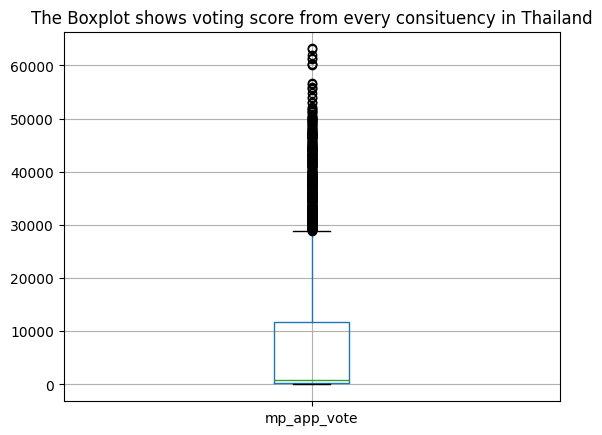

In [154]:
# Create a boxplot for the "mp_app_vote" column
df.boxplot(column=["mp_app_vote"])

# Set a title for the boxplot
plt.title("The Boxplot shows voting score from every consituency in Thailand")

# Show the plot
plt.show()

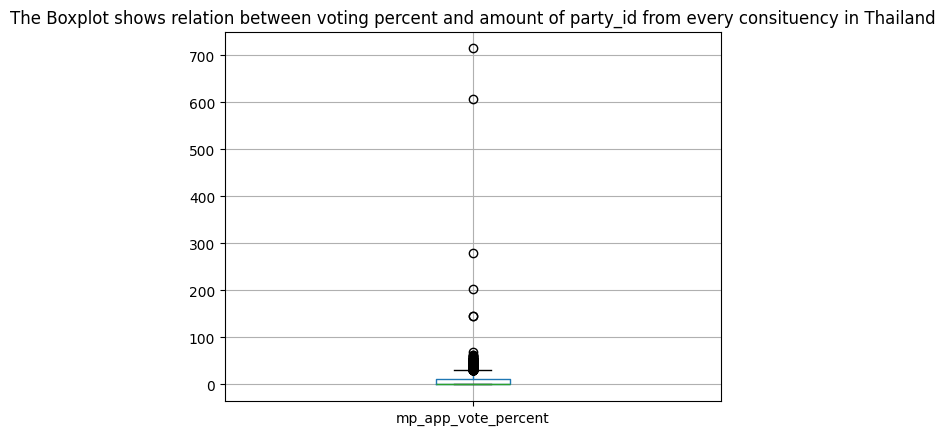

In [155]:
# Create a boxplot for the "mp_app_vote" column
df.boxplot(column=["mp_app_vote_percent"])

# Set a title for the boxplot
plt.title("The Boxplot shows relation between voting percent and amount of party_id from every consituency in Thailand")

# Show the plot
plt.show()

**6. Outlier treatment**

**Checking outlier in voting score**

In [156]:
sub_town_sum = df.groupby('cons_id')['mp_app_vote'].sum().reset_index()
sub_town_sum

,cons_id,mp_app_vote
0,ACR_1,100946
1,ACR_2,106888
2,ATG_1,84454
3,ATG_2,83268
4,AYA_1,102821
...,...,...
395,YLA_2,93349
396,YLA_3,90913
397,YST_1,106293
398,YST_2,94418


In [157]:
df_rcs.head(10)

,prov_id,cons_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report
0,ACR,ACR_1,105574,72.60136,310,100.0,False
1,ACR,ACR_2,111813,71.70350,331,100.0,False
2,ATG,ATG_1,89756,80.19872,239,100.0,False
3,ATG,ATG_2,91466,81.13075,253,100.0,False
4,AYA,AYA_1,110317,79.55591,226,100.0,False
5,AYA,AYA_2,106945,83.65404,223,100.0,False
6,AYA,AYA_3,107898,82.51101,197,100.0,False
7,AYA,AYA_4,113956,84.83351,201,100.0,False
8,AYA,AYA_5,107230,80.72968,213,100.0,False
9,BKK,BKK_1,94407,68.63767,239,100.0,False


**Compare the values between turn_out and mp_app_vote**

We found 2 data that have mp_app_vote more than turn_out. Therefore we can summary that these 2 data are false.

In [158]:
# Create a new column 'comparison_result'
sub_town_sum['comparison_result'] = (df_rcs['turn_out'] > sub_town_sum['mp_app_vote']).astype(int)
# Assuming your DataFrame is named df
result_zero_rows = sub_town_sum[sub_town_sum['comparison_result'] == 0]
result_zero_rows = pd.merge(result_zero_rows, df_rcs[['cons_id', 'turn_out']], on='cons_id')
# Display the resulting DataFrame
print(result_zero_rows)

  cons_id  mp_app_vote  comparison_result  turn_out
0   NST_6        84423                  0      3823
1   PRE_2        88027                  0     66028


In [159]:
deleted_df = df[~df['cons_id'].str.contains('NST_6|PRE_2')]
deleted_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,9,459,0.43477,706
1,ACR_1,1,38275,36.25419,709
2,ACR_1,13,126,0.11935,712
3,ACR_1,12,127,0.12029,742
4,ACR_1,11,212,0.20081,761
...,...,...,...,...,...
4776,YST_3,1,37946,36.30085,709
4777,YST_3,7,821,0.78541,763
4778,YST_3,9,531,0.50798,712
4779,YST_3,11,296,0.28317,769


array([[<Axes: title={'center': 'mp_app_vote_percent'}>]], dtype=object)

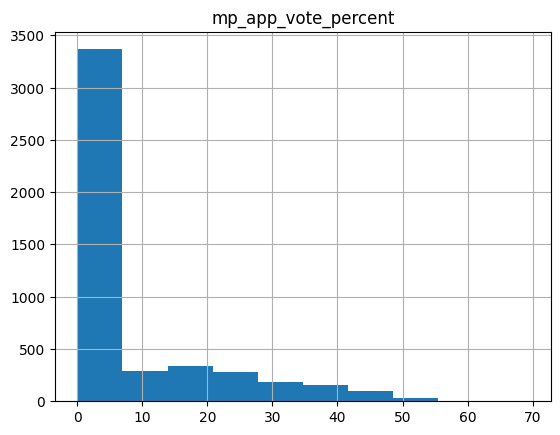

In [160]:
deleted_df.hist(['mp_app_vote_percent'])

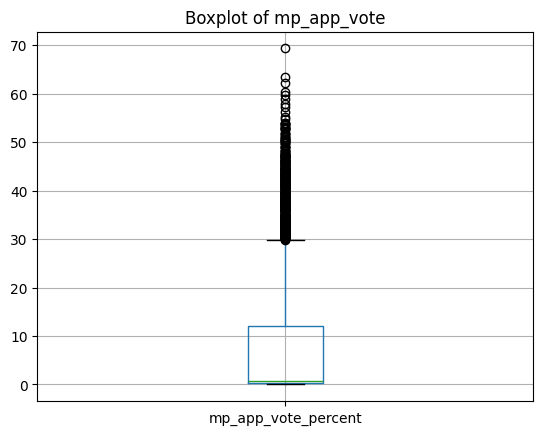

In [161]:
# Create a boxplot for the "mp_app_vote" column
deleted_df.boxplot(column=["mp_app_vote_percent"])

# Set a title for the boxplot
plt.title("Boxplot of mp_app_vote")

# Show the plot
plt.show()

In [162]:
import pandas as pd

# Group by 'cons_id' and sum 'mp_app_vote_percent'
sum_percent = deleted_df.groupby('cons_id')['mp_app_vote_percent'].sum().reset_index()

# Filter rows where the sum is more than 100
result = sum_percent[sum_percent['mp_app_vote_percent'] > 100]

print(result)

Empty DataFrame
Columns: [cons_id, mp_app_vote_percent]
Index: []


**7. Missing values treatment**

In [163]:
# Finding how many missing values are there for each column
deleted_df.isnull().sum()

cons_id                0
mp_app_rank            0
mp_app_vote            0
mp_app_vote_percent    0
party_id               0
dtype: int64

**No missing values** in this data

**8. Feature selection Catagorize Visualize correlation analysis and Statistical measurement**

**Catagorize provinces**

In [164]:
north_provinces = ['CMI','LPN','LPG','UTT','PRE','NAN','PYO','CRI','MSN']

North_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(north_provinces))].reset_index(drop=True)
North_df = North_df[(North_df['mp_app_rank'] >= 1) & (North_df['mp_app_rank'] <= 5)]
# North_df = North_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
North_df['part_name'] = 'North'
North_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
0,CMI_1,2,30086,27.74284,705,North
7,CMI_1,1,48823,45.02056,726,North
12,CMI_1,5,1514,1.39609,701,North
13,CMI_1,4,8471,7.81126,762,North
14,CMI_1,3,9772,9.01094,763,North
...,...,...,...,...,...,...
418,UTT_3,3,12896,13.94403,763,North
419,UTT_3,4,1543,1.66840,701,North
420,UTT_3,2,18506,20.00995,726,North
422,UTT_3,1,48779,52.74318,705,North


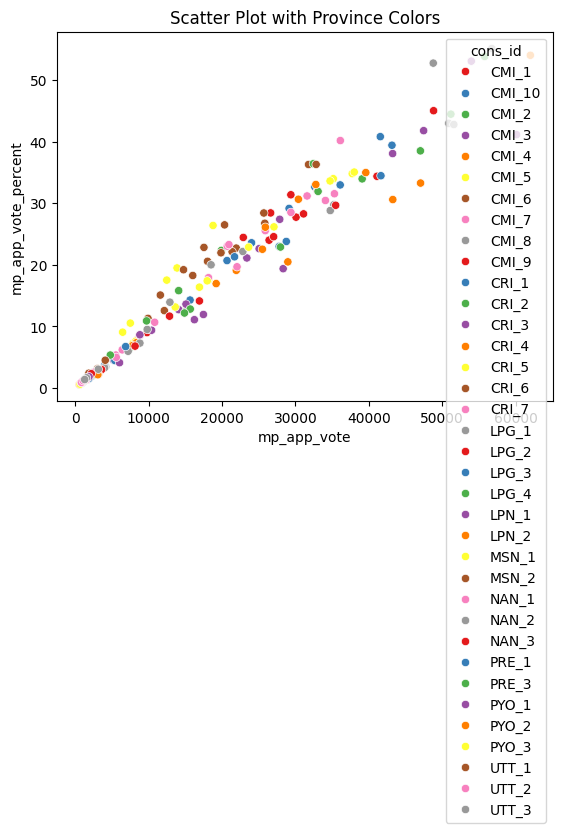

In [165]:
sns.scatterplot(x='mp_app_vote', y='mp_app_vote_percent', hue='cons_id', data=North_df, palette='Set1')

# Add labels and title
plt.xlabel('mp_app_vote')
plt.ylabel('mp_app_vote_percent')
plt.title('Scatter Plot with Province Colors')

# Show the plot
plt.show()

In [166]:
western_provinces = ['TAK','RBR','KRI','PBI','PKN']

Western_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(western_provinces))].reset_index(drop=True)
Western_df = Western_df[(Western_df['mp_app_rank'] >= 1) & (Western_df['mp_app_rank'] <= 5)]
# Western_df = Western_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
Western_df['part_name'] = 'Western'
Western_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
0,KRI_1,1,33183,31.38703,705,Western
6,KRI_1,4,9538,9.02177,763,Western
7,KRI_1,5,7879,7.45256,709,Western
8,KRI_1,3,19856,18.78133,743,Western
10,KRI_1,2,25720,24.32795,726,Western
...,...,...,...,...,...,...
194,TAK_3,3,14164,14.33632,709,Western
195,TAK_3,5,9212,9.32408,701,Western
197,TAK_3,1,31550,31.93384,743,Western
199,TAK_3,2,17380,17.59145,726,Western


In [167]:
# List of values you want to filter on
east_provinces = ['CBI','RYG','CTI','TRT','CCO','PRI','NYK','SKW']

East_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(east_provinces))].reset_index(drop=True)
East_df = East_df[(East_df['mp_app_rank'] >= 1) & (East_df['mp_app_rank'] <= 5)]
# East_df = East_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
East_df['part_name'] = 'East'
East_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
5,CBI_1,1,36463,34.73097,726,East
6,CBI_1,3,27787,26.46709,705,East
8,CBI_1,5,540,0.51435,743,East
9,CBI_1,4,751,0.71533,701,East
10,CBI_1,2,32542,30.99622,763,East
...,...,...,...,...,...,...
305,TRT_1,1,44576,34.37384,726,East
306,TRT_1,3,18399,14.18800,743,East
308,TRT_1,2,24090,18.57650,705,East
309,TRT_1,4,11356,8.75694,763,East


In [168]:
# List of Esan provinces
esan_provinces = ['NMA', 'BRM', 'SRN', 'SSK', 'UBN', 'YST', 'CPM', 'ACR', 'BKN', 'NBP', 'KKN', 'UDN', 'LEI', 'NKI', 'MKM', 'RET', 'KSN', 'SNK', 'NPM', 'MDH']

Esan_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(esan_provinces))].reset_index(drop=True)
Esan_df = Esan_df[(Esan_df['mp_app_rank'] >= 1) & (Esan_df['mp_app_rank'] <= 5)]
# Esan_df = Esan_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
Esan_df['part_name'] = 'Esan'
Esan_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
1,ACR_1,1,38275,36.25419,709,Esan
8,ACR_1,4,15926,15.08515,701,Esan
9,ACR_1,3,16724,15.84102,726,Esan
11,ACR_1,2,21388,20.25878,705,Esan
12,ACR_1,5,2825,2.67585,743,Esan
...,...,...,...,...,...,...
1702,YST_3,4,13483,12.89844,707,Esan
1704,YST_3,2,25205,24.11223,705,Esan
1706,YST_3,5,4957,4.74209,743,Esan
1707,YST_3,1,37946,36.30085,709,Esan


In [169]:
central_provinces = ['BKK','SPK','NBI','PTE','AYA','ATG','LRI','SBR','CNT','SRI','NSN','UTI','KPT','STI','PLK','PCT','PNB','SPB','NPT','SKN','SKM']

Central_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(central_provinces))].reset_index(drop=True)
Central_df = Central_df[(Central_df['mp_app_rank'] >= 1) & (Central_df['mp_app_rank'] <= 5)]
# Central_df = Central_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
Central_df['part_name'] = 'Central'
Central_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
0,ATG_1,3,15591,17.37043,726,Central
2,ATG_1,4,1599,1.78150,763,Central
4,ATG_1,5,617,0.68742,743,Central
6,ATG_1,2,20828,23.20513,705,Central
7,ATG_1,1,44725,49.82954,709,Central
...,...,...,...,...,...,...
1407,UTI_2,2,18690,19.93154,705,Central
1410,UTI_2,1,43505,46.39494,709,Central
1411,UTI_2,5,1528,1.62950,701,Central
1412,UTI_2,3,18435,19.65960,726,Central


In [170]:
# List of values you want to filter on
southern_provinces = ['NST', 'KBI', 'PNA', 'PKT', 'SNI', 'RNG', 'CPN', 'SKA', 'STN', 'TRG', 'PLG', 'PTN', 'YLA', 'NWT']

Southern_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(southern_provinces))].reset_index(drop=True)
Southern_df = Southern_df[(Southern_df['mp_app_rank'] >= 1) & (Southern_df['mp_app_rank'] <= 5)]
# Southern_df = Southern_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
Southern_df['part_name'] = 'Southern'
Southern_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
2,CPN_1,1,36222,33.45803,763,Southern
3,CPN_1,2,32084,29.63579,701,Southern
7,CPN_1,5,1963,1.81321,705,Southern
10,CPN_1,3,15592,14.40223,743,Southern
11,CPN_1,4,13645,12.60380,726,Southern
...,...,...,...,...,...,...
679,YLA_3,5,5286,5.39630,701,Southern
680,YLA_3,1,31741,32.40332,740,Southern
681,YLA_3,3,16575,16.92086,726,Southern
687,YLA_3,4,6270,6.40083,763,Southern


In [171]:
merged_df = pd.concat([North_df, Western_df, East_df, Esan_df, Central_df, Southern_df])
merged_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,part_name
0,CMI_1,2,30086,27.74284,705,North
7,CMI_1,1,48823,45.02056,726,North
12,CMI_1,5,1514,1.39609,701,North
13,CMI_1,4,8471,7.81126,762,North
14,CMI_1,3,9772,9.01094,763,North
...,...,...,...,...,...,...
679,YLA_3,5,5286,5.39630,701,Southern
680,YLA_3,1,31741,32.40332,740,Southern
681,YLA_3,3,16575,16.92086,726,Southern
687,YLA_3,4,6270,6.40083,763,Southern


**8.1 Relationship exloration**

**Visual exploration**
- Plotting bar chart to observe the top 5 data behaviors from each part of Thailand.

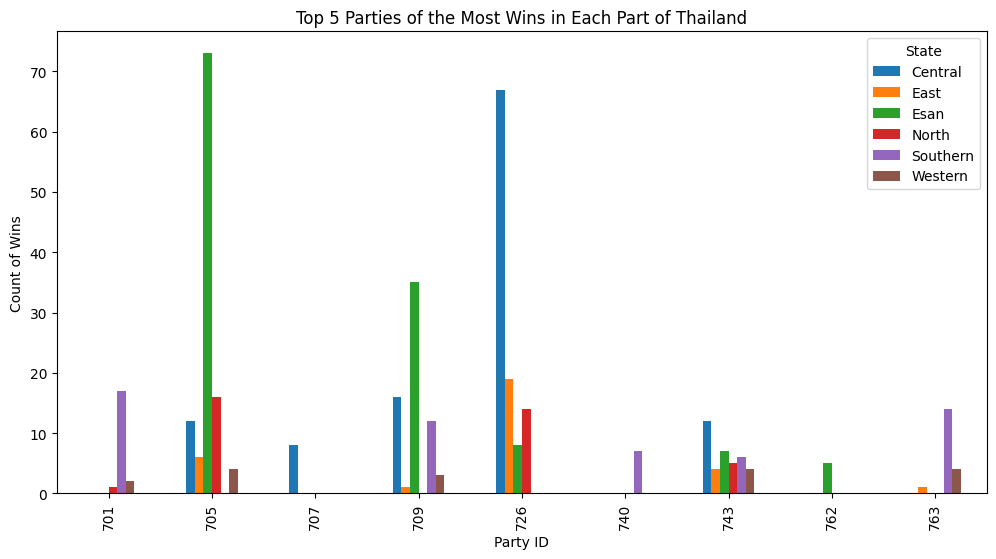

In [172]:
# Get the top 5 parties for each state
# Filter rows where mp_app_rank is 1

app_rank_df_1 = merged_df[merged_df['mp_app_rank'] == 1]

# Get the top 5 parties for each part of Thailand
top_parties = app_rank_df_1.groupby(['part_name', 'party_id']).size().reset_index(name='count')
top_parties = top_parties.groupby('part_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Pivot the DataFrame for plotting
pivot_df = top_parties.pivot(index='party_id', columns='part_name', values='count')

# Plotting the stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))
ax.set_xlabel('Party ID')
ax.set_ylabel('Count of Wins')
ax.set_title('Top 5 Parties of the Most Wins in Each Part of Thailand')
plt.legend(title='State')

plt.show()

In [173]:
explored_df = merged_df.copy()
explored_df = explored_df.drop(["cons_id","part_name"], axis=1).reset_index(drop=True)
explored_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,2,30086,27.74284,705
1,1,48823,45.02056,726
2,5,1514,1.39609,701
3,4,8471,7.81126,762
4,3,9772,9.01094,763
...,...,...,...,...
1984,5,5286,5.39630,701
1985,1,31741,32.40332,740
1986,3,16575,16.92086,726
1987,4,6270,6.40083,763


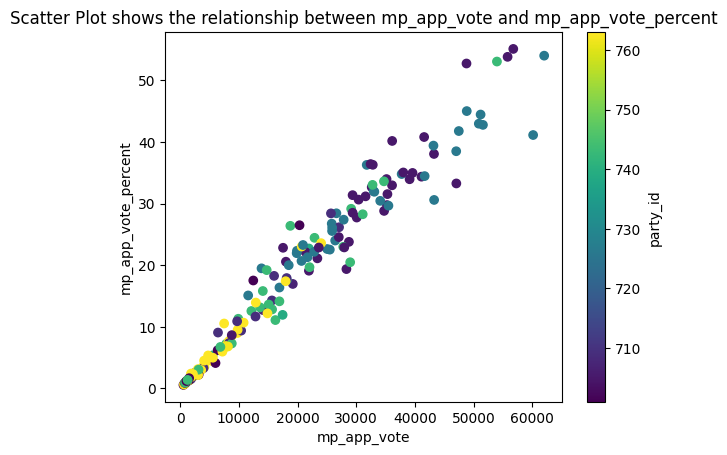

In [174]:
# Sample data
x = North_df.mp_app_vote
y = North_df.mp_app_vote_percent
category = North_df.party_id  # Replace 'some_category' with the actual column that represents categories

# Create a scatter plot with different colors
plt.scatter(x, y, c=category, cmap='viridis')  # 'cmap' specifies the colormap for coloring data points

# Add labels and title
plt.xlabel('mp_app_vote')
plt.ylabel('mp_app_vote_percent')
plt.title('Scatter Plot shows the relationship between mp_app_vote and mp_app_vote_percent')

# Add a colorbar to show the legend for the colors
cbar = plt.colorbar()
cbar.set_label('party_id')

# Show the plot
plt.show()


**8.2 Checking correlated of data**

**8.2.1 Visual exploration**

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using **Anova test**.

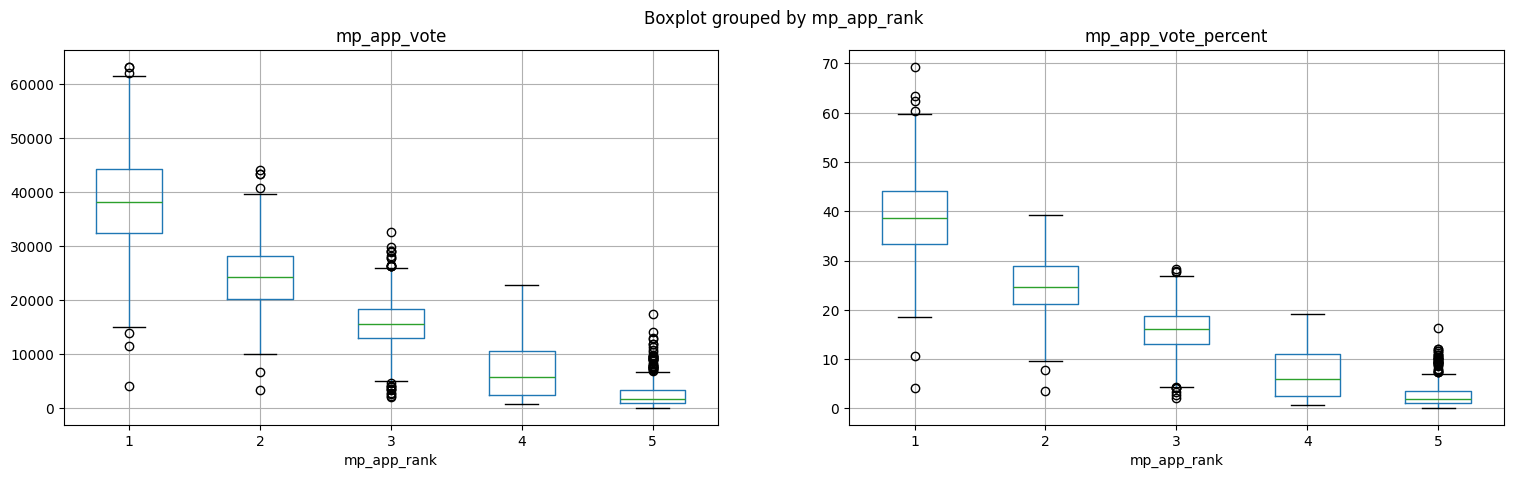

In [175]:
# Box plots for Categorical Target Variable "mp_app_rank" and continuous predictors "mp_app_vote" and "mp_app_vote_percent"
ContinuousColsList=['mp_app_vote' ,'mp_app_vote_percent']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "mp_app_rank"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    explored_df.boxplot(column=PredictorCol, by='mp_app_rank', figsize=(5,5), vert=True, ax=PlotCanvas[i])

**8.2.2 Statistical Feature Selection**

**Chi-Square test** is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are related to each other
* Result of Chi-Sq Test: party_id is correlated with mp_app_rank is true

In [176]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [177]:
CategoricalVariables=["party_id"]

# Calling the function
FunctionChisq(inpData=explored_df,
              TargetVariable='mp_app_rank',
              CategoricalVariablesList= CategoricalVariables)

party_id is correlated with mp_app_rank | P-Value: 3.560246981638791e-104


['party_id']

-------------------------------------------------

ข้างล่างเป็น Model ไม่ต้องไปยุ่ง

**9. Selecting final predictors for Machine Learning summary**

**Define Selected feature to training and testing data**

In [192]:
SelectedColumns = ['mp_app_vote','mp_app_vote_percent','party_id']

DataForTraining_Esan = Esan_df[SelectedColumns]
DataForTesting_East = East_df[SelectedColumns]
DataForTesting_North = North_df[SelectedColumns]
DataForTesting_South = Southern_df[SelectedColumns]
DataForTesting_West = Western_df[SelectedColumns]
DataForTesting_Central = Central_df[SelectedColumns]
DataForTraining_Esan.head()

,mp_app_vote,mp_app_vote_percent,party_id
1,38275,36.25419,709
8,15926,15.08515,701
9,16724,15.84102,726
11,21388,20.25878,705
12,2825,2.67585,743


**Define Selected target to training and testing data**

In [193]:
TargetColumns = ['mp_app_rank']
label_encoder = LabelEncoder()
DataForTraining_Esan.loc[:, TargetColumns] = label_encoder.fit_transform(Esan_df[TargetColumns].values.ravel())
DataForTesting_East.loc[:, TargetColumns] = label_encoder.transform(East_df[TargetColumns].values.ravel())
DataForTesting_North.loc[:, TargetColumns] = label_encoder.transform(North_df[TargetColumns].values.ravel())
DataForTesting_South.loc[:, TargetColumns] = label_encoder.transform(Southern_df[TargetColumns].values.ravel())
DataForTesting_West.loc[:, TargetColumns] = label_encoder.transform(Western_df[TargetColumns].values.ravel())
DataForTesting_Central.loc[:, TargetColumns] = label_encoder.transform(Central_df[TargetColumns].values.ravel())
# # Assuming 'TargetColumns' is a list of column names
# DataForTraining_Esan.loc[:, TargetColumns] = Esan_df[TargetColumns]
# DataForTesting_East.loc[:, TargetColumns] = East_df[TargetColumns]
# DataForTesting_North.loc[:, TargetColumns] = North_df[TargetColumns]
# DataForTesting_South.loc[:, TargetColumns] = Southern_df[TargetColumns]
# DataForTesting_West.loc[:, TargetColumns] = Western_df[TargetColumns]

DataForTraining_Esan.head()

,mp_app_vote,mp_app_vote_percent,party_id,mp_app_rank
1,38275,36.25419,709,0
8,15926,15.08515,701,3
9,16724,15.84102,726,2
11,21388,20.25878,705,1
12,2825,2.67585,743,4


**10. Data Pre-processing**

**10.1 Data Transformation**

In [234]:
Target = 'mp_app_rank'
Predictors = ['mp_app_vote','mp_app_vote_percent','party_id']
x_train = DataForTraining_Esan[Predictors].values
y_train = DataForTraining_Esan[Target].values
x_test_North = DataForTesting_North[Predictors].values
y_test_North = DataForTesting_North[Target].values
x_test_East = DataForTesting_East[Predictors].values
y_test_East = DataForTesting_East[Target].values
x_test_Central = DataForTesting_Central[Predictors].values
y_test_Central = DataForTesting_Central[Target].values
x_test_West = DataForTesting_West[Predictors].values
y_test_West = DataForTesting_West[Target].values
x_test_South = DataForTesting_South[Predictors].values
y_test_South = DataForTesting_South[Target].values

In [235]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test_North.shape)
print(y_test_North.shape)
print(x_test_East.shape)
print(y_test_East.shape)
print(x_test_Central.shape)
print(y_test_Central.shape)
print(x_test_West.shape)
print(y_test_West.shape)
print(x_test_South.shape)
print(y_test_South.shape)

(664, 3)
(664,)
(180, 3)
(180,)
(155, 3)
(155,)
(600, 3)
(600,)
(95, 3)
(95,)
(295, 3)
(295,)


**11.Model construction**

**11.1 Model Benchmark testing**
- จะทำ Model Benchmark โดยใช้ Training set เป็นภาคอีสาน ส่วนของ Testing set จะเป็นภาคกลาง และจะทำการใช้ Set นี้สำหรับการทดสอบทั้ง 3 Models

**11.1.1 Logistic Regression**

In [236]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg',random_state=42)

# Printing all the parameters of Linear regression
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
LOG=clf.fit(x_train,y_train)

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=LOG.predict(x_train)
TrainingDataResults=pd.DataFrame(data=x_train, columns=Predictors)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted '+Target)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=LOG.predict(x_test_Central)
TestingDataResults=pd.DataFrame(data=x_test_Central, columns=Predictors)
TestingDataResults[Target]=y_test_Central
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test_Central, TestingPrediction))
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=LOG.predict(x_test_North)
TestingDataResults=pd.DataFrame(data=x_test_North, columns=Predictors)
TestingDataResults[Target]=y_test_North
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)


print("The results of testing data")
print(metrics.classification_report(y_test_North, TestingPrediction))

LogisticRegression(C=1, random_state=42, solver='newton-cg')
****************************************************************************************************

Training result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      38275.0             36.25419     709.0            0   
1      15926.0             15.08515     701.0            3   
2      16724.0             15.84102     726.0            2   
3      21388.0             20.25878     705.0            1   
4       2825.0              2.67585     743.0            4   

   Predicted mp_app_rank  
0                      0  
1                      2  
2                      2  
3                      1  
4                      4  
****************************************************************************************************

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      15591.0             17.37043     726.0            2   
1       1599.0         

c:\Users\natch\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


**11.1.2 Decision Tree Classification**

DecisionTreeClassifier(criterion='entropy', max_depth=7)
****************************************************************************************************

Training result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      38275.0             36.25419     709.0            0   
1      15926.0             15.08515     701.0            3   
2      16724.0             15.84102     726.0            2   
3      21388.0             20.25878     705.0            1   
4       2825.0              2.67585     743.0            4   

   Predicted mp_app_rank  
0                      0  
1                      3  
2                      2  
3                      1  
4                      4  
****************************************************************************************************

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      15591.0             17.37043     726.0            2   
1       1599.0             

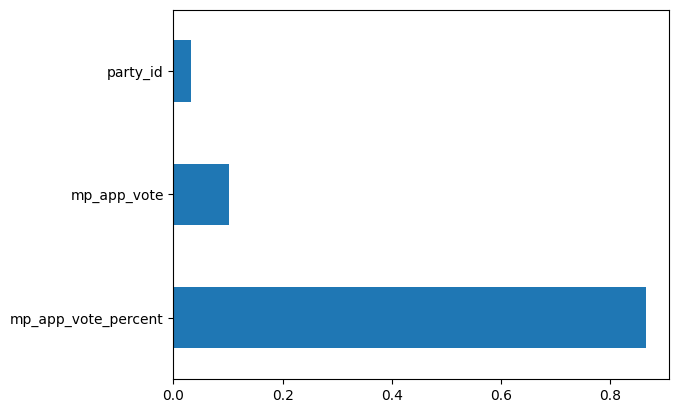

In [237]:
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=7,criterion='entropy')
# Or you can find best hyperparameters using GridSearchCV

# Printing all the parameters of Decision Tree
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=DTree.predict(x_train)
TrainingDataResults=pd.DataFrame(data=x_train, columns=Predictors)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted '+Target)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_Central)
TestingDataResults=pd.DataFrame(data=x_test_Central, columns=Predictors)
TestingDataResults[Target]=y_test_Central
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()


In [238]:
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test_Central, TestingPrediction))
print(metrics.confusion_matrix(y_test_Central, TestingPrediction))
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_North)
TestingDataResults=pd.DataFrame(data=x_test_North, columns=Predictors)
TestingDataResults[Target]=y_test_North
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

print("The results of testing data")
print(metrics.classification_report(y_test_North, TestingPrediction))
print(metrics.confusion_matrix(y_test_North, TestingPrediction))

The results of training data
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       133
           1       0.80      0.98      0.88       133
           2       0.94      0.77      0.84       133
           3       0.74      0.55      0.63       133
           4       0.68      0.90      0.78       132

    accuracy                           0.81       664
   macro avg       0.83      0.81      0.81       664
weighted avg       0.83      0.81      0.81       664

[[117  16   0   0   0]
 [  2 130   1   0   0]
 [  1  17 102  13   0]
 [  0   0   5  73  55]
 [  0   0   1  12 119]]
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       120
           1       0.63      0.75      0.68       120
           2       0.54      0.47      0.51       120
           3       

In [288]:
# Fit the model on the training set
RForest = RandomForestClassifier(n_estimators=300, random_state= 101).fit(x_train, y_train)
TrainingPrediction = RForest.predict(x_train)

# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=RForest.predict(x_test_Central)
TestingDataResults=pd.DataFrame(data=x_test_Central, columns=Predictors)
TestingDataResults[Target]=y_test_Central
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

print("The results of testing data")
print(metrics.classification_report(y_test_Central, TestingPrediction))
print(metrics.confusion_matrix(y_test_Central, TestingPrediction))

print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=RForest.predict(x_test_North)
TestingDataResults=pd.DataFrame(data=x_test_North, columns=Predictors)
TestingDataResults[Target]=y_test_North
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

print("The results of testing data")
print(metrics.classification_report(y_test_North, TestingPrediction))
print(metrics.confusion_matrix(y_test_North, TestingPrediction))

The results of training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       133
           4       1.00      1.00      1.00       132

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664

[[133   0   0   0   0]
 [  0 133   0   0   0]
 [  0   0 133   0   0]
 [  0   0   0 133   0]
 [  0   0   0   0 132]]
****************************************************************************************************

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      15591.0             17.37043     726.0            2   
1       1599.0              1.78150     763.0            3   
2        617.0              0.68742     743.0       

In [289]:
print('Accuracy of Esan trainning set:{:.2f}'.format(LOG.score(x_train, y_train)))
print('Accuracy of Central testing set:{:.2f}'.format(LOG.score(x_test_Central, y_test_Central)))
print('Accuracy of North testing set:{:.2f}'.format(LOG.score(x_test_North, y_test_North)))
print()
print('Accuracy of Esan trainning set:{:.2f}'.format(DTree.score(x_train, y_train)))
print('Accuracy of Central testing set:{:.2f}'.format(DTree.score(x_test_Central, y_test_Central)))
print('Accuracy of North testing set:{:.2f}'.format(DTree.score(x_test_North, y_test_North)))
print()
print('Accuracy of Esan trainning set:{:.2f}'.format(RForest.score(x_train, y_train)))
print('Accuracy of Central testing set:{:.2f}'.format(RForest.score(x_test_Central, y_test_Central)))
print('Accuracy of North testing set:{:.2f}'.format(RForest.score(x_test_North, y_test_North)))

Accuracy of Esan trainning set:0.71
Accuracy of Central testing set:0.70
Accuracy of North testing set:0.63

Accuracy of Esan trainning set:0.81
Accuracy of Central testing set:0.66
Accuracy of North testing set:0.59

Accuracy of Esan trainning set:1.00
Accuracy of Central testing set:0.67
Accuracy of North testing set:0.60


In [290]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_North)
TestingDataResults=pd.DataFrame(data=x_test_North, columns=Predictors)
TestingDataResults[Target]=y_test_North
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_North, TestingPrediction))
print(metrics.confusion_matrix(y_test_North, TestingPrediction))

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      30086.0             27.74284     705.0            1   
1      48823.0             45.02056     726.0            0   
2       1514.0              1.39609     701.0            4   
3       8471.0              7.81126     762.0            3   
4       9772.0              9.01094     763.0            2   

   Predicted mp_app_rank  
0                      1  
1                      0  
2                      4  
3                      3  
4                      3  
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.81      0.58      0.68        36
           1       0.52      0.72      0.60        36
           2       0.48      0.33      0.39        36
           3       0.49      0.64      0.55        36
           4       0.75      0.67     

In [291]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_East)
TestingDataResults=pd.DataFrame(data=x_test_East, columns=Predictors)
TestingDataResults[Target]=y_test_East
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_East, TestingPrediction))
print(metrics.confusion_matrix(y_test_East, TestingPrediction))

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      36463.0             34.73097     726.0            0   
1      27787.0             26.46709     705.0            2   
2        540.0              0.51435     743.0            4   
3        751.0              0.71533     701.0            3   
4      32542.0             30.99622     763.0            1   

   Predicted mp_app_rank  
0                      0  
1                      1  
2                      4  
3                      4  
4                      0  
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        31
           1       0.47      0.74      0.58        31
           2       0.65      0.35      0.46        31
           3       0.57      0.55      0.56        31
           4       0.67      0.77     

In [292]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_West)
TestingDataResults=pd.DataFrame(data=x_test_West, columns=Predictors)
TestingDataResults[Target]=y_test_West
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_West, TestingPrediction))
print(metrics.confusion_matrix(y_test_West, TestingPrediction))

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      33183.0             31.38703     705.0            0   
1       9538.0              9.02177     763.0            3   
2       7879.0              7.45256     709.0            4   
3      19856.0             18.78133     743.0            2   
4      25720.0             24.32795     726.0            1   

   Predicted mp_app_rank  
0                      1  
1                      3  
2                      3  
3                      2  
4                      1  
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.45      0.47      0.46        19
           2       0.48      0.63      0.55        19
           3       0.38      0.53      0.44        19
           4       0.69      0.47     

In [293]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_South)
TestingDataResults=pd.DataFrame(data=x_test_South, columns=Predictors)
TestingDataResults[Target]=y_test_South
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_South, TestingPrediction))
print(metrics.confusion_matrix(y_test_South, TestingPrediction))

Testing result prediction
   mp_app_vote  mp_app_vote_percent  party_id  mp_app_rank  \
0      36222.0             33.45803     763.0            0   
1      32084.0             29.63579     701.0            1   
2       1963.0              1.81321     705.0            4   
3      15592.0             14.40223     743.0            2   
4      13645.0             12.60380     726.0            3   

   Predicted mp_app_rank  
0                      0  
1                      1  
2                      4  
3                      3  
4                      2  
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        59
           1       0.52      0.69      0.59        59
           2       0.45      0.63      0.52        59
           3       0.43      0.49      0.46        59
           4       0.76      0.37     

|--- mp_app_vote_percent <= 18.37
|   |--- mp_app_vote_percent <= 6.14
|   |   |--- mp_app_vote <= 2889.00
|   |   |   |--- mp_app_vote_percent <= 0.81
|   |   |   |   |--- class: 4
|   |   |   |--- mp_app_vote_percent >  0.81
|   |   |   |   |--- mp_app_vote_percent <= 1.34
|   |   |   |   |   |--- mp_app_vote_percent <= 1.24
|   |   |   |   |   |   |--- mp_app_vote <= 745.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- mp_app_vote >  745.50
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- mp_app_vote_percent >  1.24
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- mp_app_vote_percent >  1.34
|   |   |   |   |   |--- mp_app_vote <= 2824.50
|   |   |   |   |   |   |--- mp_app_vote <= 2654.00
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- mp_app_vote >  2654.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- mp_app_vote >  2824.50
|   |   |   |   |   |   |--- class: 4
|   |   |--- mp_app_vot

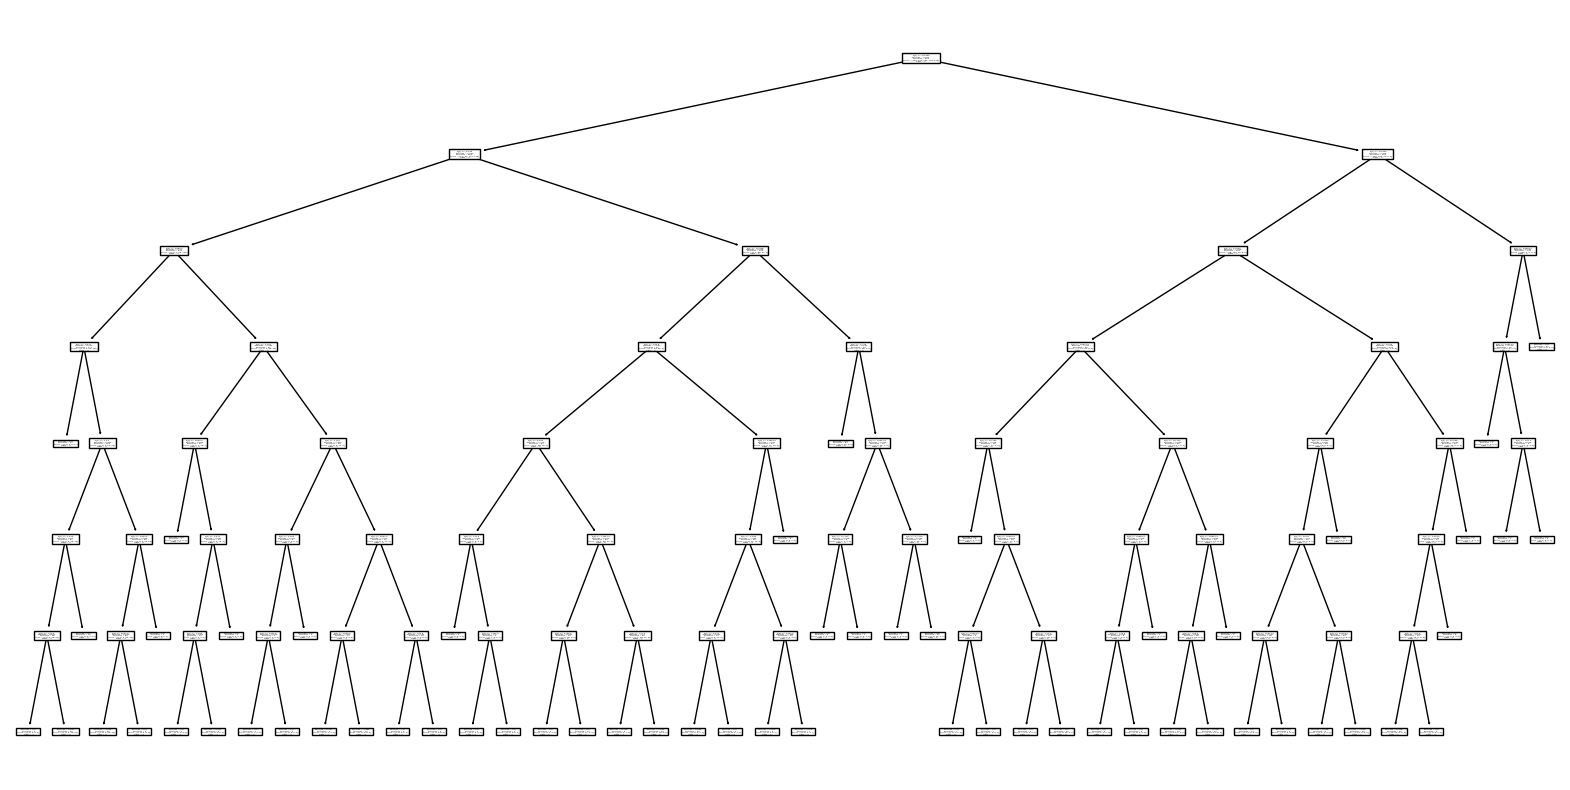

In [294]:
#Vitualization
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
print(export_text(DTree,feature_names=Predictors))
plt.figure(figsize=(20,10))
plot_tree(DTree,class_names=explored_df['mp_app_rank'].unique().astype(str).tolist())
plt.show()

In [295]:
print('Accuracy of Esan trainning set:{:.2f}'.format(DTree.score(x_train, y_train)))
print('Accuracy of Central testing set:{:.2f}'.format(DTree.score(x_test_Central, y_test_Central)))
print('Accuracy of North testing set:{:.2f}'.format(DTree.score(x_test_North, y_test_North)))
print('Accuracy of East testing set:{:.2f}'.format(DTree.score(x_test_East, y_test_East)))
print('Accuracy of West testing set:{:.2f}'.format(DTree.score(x_test_West, y_test_West)))
print('Accuracy of South testing set:{:.2f}'.format(DTree.score(x_test_South, y_test_South)))

Accuracy of Esan trainning set:0.81
Accuracy of Central testing set:0.66
Accuracy of North testing set:0.59
Accuracy of East testing set:0.60
Accuracy of West testing set:0.52
Accuracy of South testing set:0.54


**12. Result Analysis**